In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading in training data
data=pd.read_csv("dataF.csv")

#Declaring global variables
input_mat=data.values
num_features=input_mat.shape[1]-1
training_size=input_mat.shape[0]


#ADALINE weight update rule for CaseA(Individual update)
def weight_update(weight_vec,err_val,input_vec,lr):
    wlen=len(weight_vec)
    change=2.0*lr*err_val
    for i in range(wlen):
        weight_vec[i]+=change*input_vec[i]
    return weight_vec 


#ADALINE weight update rule for CaseB(Batch update)
def weight_change(err_val,input_vec,lr):
    wlen=len(input_vec)
    weight_vec = np.zeros(num_features)
    change=2.0*lr*err_val
    for i in range(wlen):
        weight_vec[i]+=change*input_vec[i]
    return weight_vec 

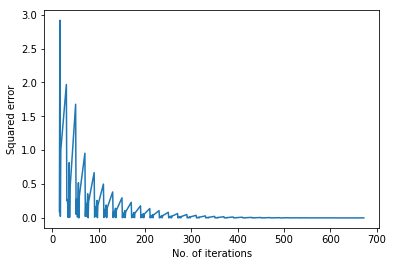

In [2]:
def main():
    weight_vec=np.random.random_sample(num_features)
    learning_rates=np.arange(0.04,0.05,0.01)

    limit=0.0001   #Threshold of error after which learning is stopped. 
    X = []
    Y = []
    
    #The following code tries out various learning rates to find the best one.
    for j in range(len(learning_rates)):
        
        weight_vec=np.random.random_sample(num_features)
        lr=learning_rates[j]
        
        iters =0
        counter=0
        wt_vec=[]
        
        
        #This loop breaks when counter=training_size, ie when for all the patterns, the error is less than the 
        #specified limit. One run of this loop involves an iteration of batch updating, followed by an iteration of 
        #individual updating.
        while(counter!=training_size):
            iters+=1
            
            #This part is responsible for batch updating(CaseB)
            cumul_error=0
            
            #The change in weight or delta for a particular iteration is summed up over all input data 
            #patterns and added to the weight vector at the end of the iteration.
            change_in_weight = np.zeros(num_features)
            
            for i in range(training_size):
                input_vec=input_mat[i][0:num_features]
                true=input_mat[i][num_features]
                pred=0
                for i in range(num_features):
                    pred+=(input_vec[i]*weight_vec[i])
                err_val=(true-pred)
                change_in_weight += weight_change(err_val,input_vec,lr)
                cumul_error+=err_val

            weight_vec+=change_in_weight
             
            #Values for plotting the graph
            X.append(iters*10)
            Y.append(cumul_error)
            
            
            #This part is responsible for individual updating(CaseA)
            counter=0
        
            for i in range(training_size):
                input_vec=input_mat[i][0:num_features]
                trueVal=input_mat[i][num_features]
                
                pred=0
                
                for k in range(num_features):
                    pred+=(input_vec[k]*weight_vec[k])

                err_val=trueVal-pred#Error is calclulated simply as difference of true value and predicted value.
                if(np.absolute(err_val)<limit):
                    counter+=1
                
                weight_vec=weight_update(weight_vec,err_val,input_vec,lr)
                Y.append(err_val)
                X.append(iters*10 + i+1)
                
            
            iters+=1

    #Plotting the graph
    X = np.asarray(X)
    Y = np.asarray(Y)
    Y = np.square(Y)
    plt.plot(X[5:300],Y[5:300])
    plt.xlabel('No. of iterations')
    plt.ylabel('Squared error')
    
    return weight_vec
       
weight_vec=main()


In [3]:
#Testing the model on some testing data:
for i in range(training_size):
    input_vec=input_mat[i][0:num_features]
    pred=0
    for i in range(num_features):
            pred+=(input_vec[i]*weight_vec[i])  #Using the weight vector learned from training to
                                                #generate predictions
    if(pred<0.5):
        print('T')
    else:
        print('J')   

T
J
T
J
T
J
T
J
